## The Ultimate Guide to Pokemon

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
data = pd.read_csv(r"C:\Personal\The Scrappy Project\module_5\pokemon.csv")

In [5]:
data.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


1. How many Pokemon exist in the first seven generations?

In [7]:
print('The number of pokemon in the first seven generations: ', data.shape[0])

The number of pokemon in the first seven generations:  801


2. List the columns that exist in this dataset. 

In [14]:
for col in data.columns:
    print(col)

abilities
against_bug
against_dark
against_dragon
against_electric
against_fairy
against_fight
against_fire
against_flying
against_ghost
against_grass
against_ground
against_ice
against_normal
against_poison
against_psychic
against_rock
against_steel
against_water
attack
base_egg_steps
base_happiness
base_total
capture_rate
classfication
defense
experience_growth
height_m
hp
japanese_name
name
percentage_male
pokedex_number
sp_attack
sp_defense
speed
type1
type2
weight_kg
generation
is_legendary


3. How many genderless pokemon exist?

In [22]:
print('The number of genderless pokemon:', sum(data['percentage_male'].isna()))

The number of genderless pokemon: 98


4. List the top 10 species of Pokemon where the Pokemon are overwhelmingly female. 

In [35]:
female_pokemon = data[data['percentage_male']<50].sort_values(by = 'percentage_male')

In [40]:
for pokemon in female_pokemon['name'][:10]:
    print(pokemon)

Nidoran♀
Latias
Tsareena
Vespiquen
Happiny
Froslass
Cresselia
Petilil
Illumise
Lilligant


5. List all pokemon types. 

In [43]:
print('Primary types of pokemon are: ')
print()
for t in data['type1'].unique():
    print(t)

Primary types of pokemon are: 

grass
fire
water
bug
normal
poison
electric
ground
fairy
fighting
psychic
rock
ghost
ice
dragon
dark
steel
flying


In [44]:
print('Secondary types of pokemon are: ')
print()
for t in data['type2'].unique():
    print(t)

Secondary types of pokemon are: 

poison
nan
flying
dark
electric
ice
ground
fairy
grass
fighting
psychic
steel
fire
rock
water
dragon
ghost
bug
normal


6. How many pokemons have dual types?

In [52]:
print('The number of pokemons with dual types: ', len(data['type2'].dropna()))

The number of pokemons with dual types:  417


7. Generate the descriptive stats for Pokemon weights i.e mean, median, count, min, and max.

In [54]:
data['weight_kg'].describe()

count    781.000000
mean      61.378105
std      109.354766
min        0.100000
25%        9.000000
50%       27.300000
75%       64.800000
max      999.900000
Name: weight_kg, dtype: float64

8. Create a table that has two columns: a Pokemon ability and the number of Pokemon capable of having that ability.

In [105]:
data_copy = data.copy(deep = True)
data_copy['abilities'] = data_copy['abilities'].str.replace(r'[\[\]]', '', regex=True).str.strip()
data_copy['abilities'] = data_copy['abilities'].str.split(',')
data_exploded = data_copy.explode('abilities')
data_exploded['abilities'] = data_exploded['abilities'].str.strip()

In [106]:
ability_count = data_exploded.groupby('abilities').size().reset_index(name = 'Number of pokemons')

In [107]:
ability_count

,abilities,Number of pokemons
0,'Adaptability',10
1,'Aftermath',8
2,'Air Lock',1
3,'Analytic',12
4,'Anger Point',9
...,...,...
222,'White Smoke',2
223,'Wimp Out',1
224,'Wonder Guard',1
225,'Wonder Skin ',5


9. Which generation has the highest Pokemon? Which has the fewest?

In [127]:
gens = data.groupby('generation').size().reset_index(name = 'Number of pokemons')
gens.sort_values(by = 'Number of pokemons', ascending = False, inplace = True)

In [129]:
print('The generation with the highest number of pokemons is: ', gens['generation'].iloc[0])
print('The generation with the least number of pokemons is: ', gens['generation'].iloc[-1])

The generation with the highest number of pokemons is:  5
The generation with the least number of pokemons is:  6


10. Create a new column bmi that computes the body mass index of each Pokemon. Next, create a dataframe that sorts all Pokemon by BMI.

In [133]:
data['bmi'] = data['weight_kg']/(data['height_m']**2)

In [134]:
data_bmi_sorted = data.sort_values(by = 'bmi')

In [136]:
data_bmi_sorted

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,bmi
92,['Levitate'],0.25,2.0,1.0,1.0,0.5,0.0,1.0,1.0,2.0,...,93,115,55,95,ghost,poison,0.1,1,0,0.039062
91,['Levitate'],0.25,2.0,1.0,1.0,0.5,0.0,1.0,1.0,2.0,...,92,100,35,80,ghost,poison,0.1,1,0,0.059172
146,"['Shed Skin', 'Marvel Scale']",1.00,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,...,147,50,50,50,dragon,NaN,3.3,1,0,1.018519
147,"['Shed Skin', 'Marvel Scale']",1.00,1.0,2.0,0.5,2.0,1.0,0.5,1.0,1.0,...,148,70,70,70,dragon,NaN,16.5,1,0,1.031250
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,798,59,31,109,grass,steel,0.1,7,1,1.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,"['Stench', 'Sticky Hold', 'Poison Touch', 'Poi...",0.50,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,...,89,65,100,50,poison,poison,NaN,1,0,NaN
102,"['Chlorophyll', 'Harvest', 'Frisk', 'Harvest']",4.00,2.0,1.0,0.5,1.0,0.5,2.0,2.0,2.0,...,103,125,75,45,grass,psychic,NaN,1,0,NaN
104,"['Rock Head', 'Lightningrod', 'Battle Armor', ...",1.00,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,105,50,80,45,ground,fire,NaN,1,0,NaN
719,['Magician'],1.00,4.0,1.0,1.0,1.0,0.0,1.0,1.0,4.0,...,720,170,130,80,psychic,ghost,NaN,6,1,NaN


11. Which type combination has the fewest weaknesses?

In [140]:
resistance = data[['type1', 'type2', *[col for col in data.columns if 'against' in col]]]
resistance_unique = resistance.drop_duplicates(subset = ['type1', 'type2'])

In [152]:
resistance_unique['against_total'] = resistance_unique.drop(['type1', 'type2'], axis = 1).sum(axis = 1)
resistance_unique.sort_values(by = 'against_total', inplace = True)

C:\Users\SIDDHA~1\AppData\Local\Temp/ipykernel_24080/141564908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resistance_unique['against_total'] = resistance_unique.drop(['type1', 'type2'], axis = 1).sum(axis = 1)


In [162]:
print(f"The type combination with the fewest weaknesses is: {resistance_unique['type1'].iloc[0]}-{resistance_unique['type2'].iloc[0]}" )

The type combination with the fewest weaknesses is: steel-fairy


12. List all types that a rock type Pokemon would be weak against.

In [177]:
rock_pokemons = data[(data['type1'] == 'rock')]

In [211]:
rock_pokemons_damage = rock_pokemons[[col for col in fire_pokemons.columns if 'against' in col]]
weaknesses = (rock_pokemons_damage == 2.0).any(axis=0)

In [213]:
print('All types that a rock pokemon would be weak against: ')
print()
for col in weaknesses[weaknesses].index:
    print(col.split('_')[1])


All types that a rock pokemon would be weak against: 

bug
dark
dragon
electric
fairy
fight
ghost
grass
ground
ice
psychic
rock
steel
water


13. List all types that would cause 2x damage to a fire type Pokemon.

In [179]:
fire_pokemons = data[(data['type1'] == 'fire')]

In [199]:
damage = fire_pokemons[[col for col in fire_pokemons.columns if 'against' in col]]

In [201]:
columns_with_2 = (damage == 2.0).any(axis=0)

In [208]:
print('All types that would cause 2x damage to a fire type pokemon: ')
print()
for col in columns_with_2[columns_with_2].index:
    print(col.split('_')[1])

All types that would cause 2x damage to a fire type pokemon: 

dark
dragon
electric
fight
flying
ghost
ground
psychic
rock
water


14. Find all Pokemon that have the dual Water/Ground typing.

In [183]:
water_ground_pokemons = data[(data['type1'] == 'water') & (data['type1'] == 'ground')]

In [184]:
water_ground_pokemons

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,bmi


15. Find the average speed of every type of Pokemon. Which type has the highest average speed?

In [190]:
grouped_pokemons = data.groupby(['type1', 'type2'])['speed'].mean().reset_index().sort_values(by = 'speed', ascending = False)

In [197]:
print(f"The type with the highest speed is: {grouped_pokemons['type1'].iloc[0]}-{grouped_pokemons['type2'].iloc[0]}")

The type with the highest speed is: grass-grass


#### DATA VISUALIZATION

1. What is the distribution of pokemon weights? What is the mean and standard deviation of weights?

In [9]:
data['weight_kg'].describe()

count    781.000000
mean      61.378105
std      109.354766
min        0.100000
25%        9.000000
50%       27.300000
75%       64.800000
max      999.900000
Name: weight_kg, dtype: float64

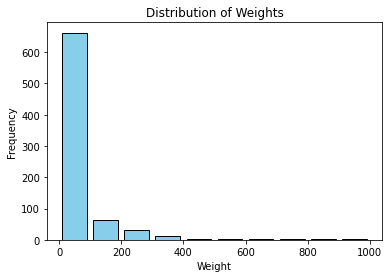

In [10]:
data['weight_kg'].plot(kind='hist', bins=10, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Weights')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

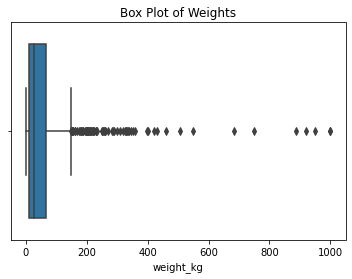

In [17]:
sns.boxplot(x=data['weight_kg'])
plt.title('Box Plot of Weights')
plt.show()

The weights of the pokemon follow a right-skewed distribution. The mean is 61.37 and the std is 109.35.

2. Is there a correlation between Pokemon height and weight? Is this correlation positive or negative?

In [20]:
print("The correlation between Pokemon height and weight is: ", data['height_m'].corr(data['weight_kg']))

The correlation between Pokemon height and weight is:  0.6265511437853196


There is a positive correlation.

3. How are the Attack and Special Attack stats of a Pokemon related? Do Pokemon with high attacks tend to have high special attacks?

In [21]:
data.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [22]:
print("The correlation between Pokemon attack and special attack is: ", data['attack'].corr(data['sp_attack']))

The correlation between Pokemon attack and special attack is:  0.36815399954959943


Attack and Special attack have a moderate positive correlation. This means pokemon with high attacks tend to have high special attacks but the relationship between is not very reliable. 

4. What is the distribution of Pokemon speed across all 18 types?

In [24]:
data['speed'].describe()

count    801.000000
mean      66.334582
std       28.907662
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      180.000000
Name: speed, dtype: float64

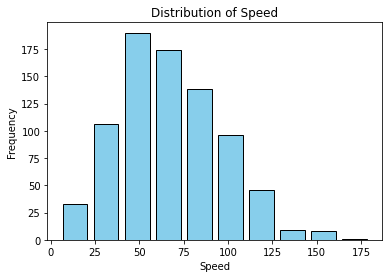

In [25]:
data['speed'].plot(kind='hist', bins=10, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

The distribution of speed across all types of pokemon is almost a normal distribution, but not quite. It is slightly right skewed. 

5. Which are the most common Pokemon types?

Text(0, 0.5, 'Count')

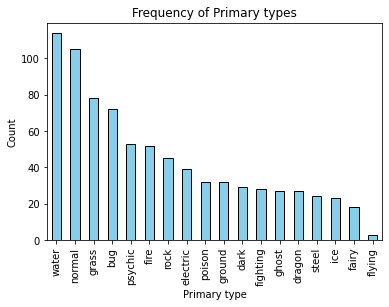

In [27]:
value_counts = data['type1'].value_counts()

value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Primary types')
plt.xlabel('Primary type')
plt.ylabel('Count')

The most common primary pokemon types are water, normal and grass.

Text(0, 0.5, 'Count')

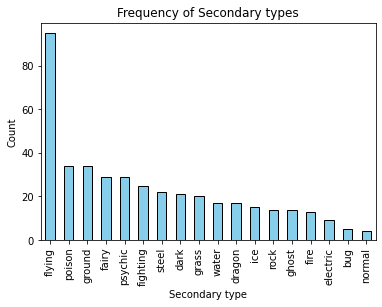

In [28]:
value_counts = data['type2'].value_counts()

value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Secondary types')
plt.xlabel('Secondary type')
plt.ylabel('Count')

The most common secondary pokemon types are flying, poison and ground.